In [49]:
%matplotlib inline
import pandas
import seaborn as sns
sns.set_style('white')
sns.set_palette('colorblind')
sns.set_context("paper", font_scale=2.3)

In [43]:
classifiers = pandas.read_csv('../../results/ukpnets/echr_classifiers.tsv', sep='\t')

In [44]:
classifiers[:20]

,Name,Accuracy,Ac-std,Precision,P-std,Recall,R-std,F1-Score,F1-std,Time/Feature,...,Config,Labels,Separation,Char embed,Word emb,Char embed size,Last layer,Layers,Dropouts,Batch Size
0,18-11-14-14-49,0.661,0.070,0.655,0.086,0.661,0.070,0.652,0.082,None,...,Explore,NaN,NaN,cnn,NaN,16,Softmax,200,0.4,50
1,18-11-14-16-39,0.611,0.071,0.630,0.061,0.611,0.071,0.611,0.065,None,...,Explore,NaN,NaN,None,NaN,64,CRF,50,0.2,50
2,18-11-14-18-15,0.635,0.050,0.702,0.060,0.635,0.050,0.641,0.048,None,...,Explore,NaN,NaN,cnn,NaN,32,CRF,200,0.5,30
3,18-11-14-20-17,0.620,0.056,0.669,0.082,0.620,0.056,0.628,0.058,None,...,Explore,NaN,NaN,lstm,NaN,64,CRF,30,0.2,30
4,18-11-14-22-02,0.616,0.036,0.637,0.036,0.616,0.036,0.617,0.028,None,...,Explore,NaN,NaN,None,NaN,64,Softmax,30,0.3,200
5,18-11-14-22-22,0.633,0.079,0.657,0.079,0.633,0.079,0.636,0.077,Word,...,Explore,NaN,NaN,lstm,NaN,16,CRF,30,0.3,100
6,18-11-15-00-38,0.640,0.085,0.697,0.089,0.640,0.085,0.648,0.090,Word,...,Explore,NaN,NaN,cnn,NaN,32,CRF,200,0.2,100
7,18-11-15-02-17,0.636,0.030,0.684,0.038,0.636,0.030,0.644,0.030,Word,...,Explore,NaN,NaN,cnn,NaN,64,CRF,100,0.4,100
8,18-11-15-04-16,0.653,0.065,0.683,0.072,0.653,0.065,0.660,0.071,Word,...,Explore,NaN,NaN,None,NaN,32,Softmax,200,0.1,200
9,18-11-15-06-01,0.645,0.071,0.688,0.075,0.645,0.071,0.648,0.072,Word,...,Explore,NaN,NaN,lstm,NaN,64,CRF,50,0.4,50


In [45]:
classifiers = classifiers.rename(columns={'Time/Feature': 'Attention type'})
classifiers = classifiers.replace(
    to_replace=['Word', 'Context'], value=['Word attention', 'Context attention'])
classifiers['Attention type'] = classifiers['Attention type'].replace('None', 'No attention')
classifiers['Activation'] = classifiers['Activation'].replace('None', 'Linear').replace(
    'tanh', 'Tanh').replace('sigmoid', 'Sigmoid')

/home/mteruel/anaconda2/envs/env35/lib/python3.5/site-packages/seaborn/categorical.py:490: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


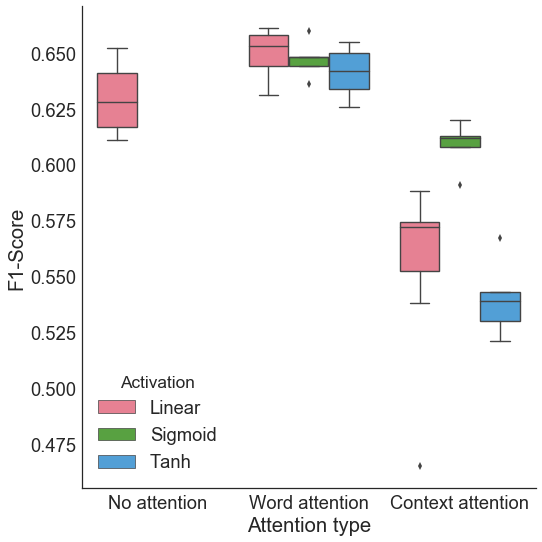

In [51]:
sns.factorplot(data=classifiers[classifiers.Config == 'Explore'], kind='box', y='F1-Score', x='Attention type', hue='Activation',
               size=8, legend_out=False, palette='husl')

/home/mteruel/anaconda2/envs/env35/lib/python3.5/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


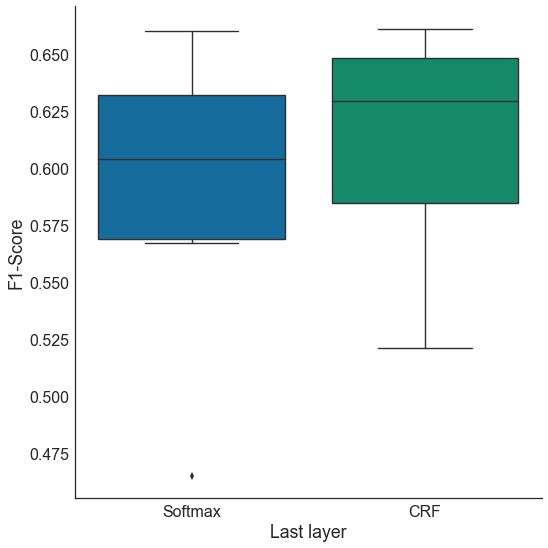

In [47]:
sns.factorplot(data=classifiers[classifiers.Config == 'Explore'], kind='box',
               y='F1-Score', x='Last layer',# hue='Time/Feature',
               size=8, legend_out=False)

/home/mteruel/anaconda2/envs/env35/lib/python3.5/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


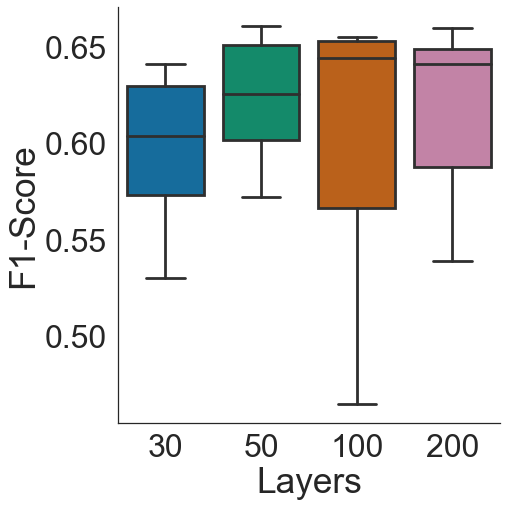

In [36]:
sns.factorplot(data=classifiers[classifiers.Config == 'Explore'], kind='box',
               y='F1-Score', x='Layers',# hue='Time/Feature',
               size=8, legend_out=False)

/home/mteruel/anaconda2/envs/env35/lib/python3.5/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


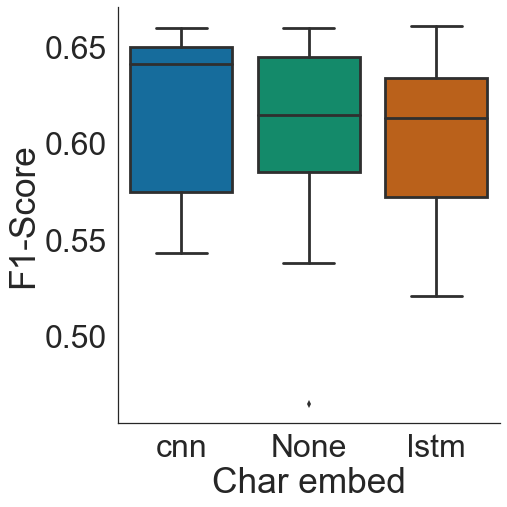

In [37]:
sns.factorplot(data=classifiers[classifiers.Config == 'Explore'], kind='box',
               y='F1-Score', x='Char embed', # hue='Time/Feature',
               size=8, legend_out=False)

/home/mteruel/anaconda2/envs/env35/lib/python3.5/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


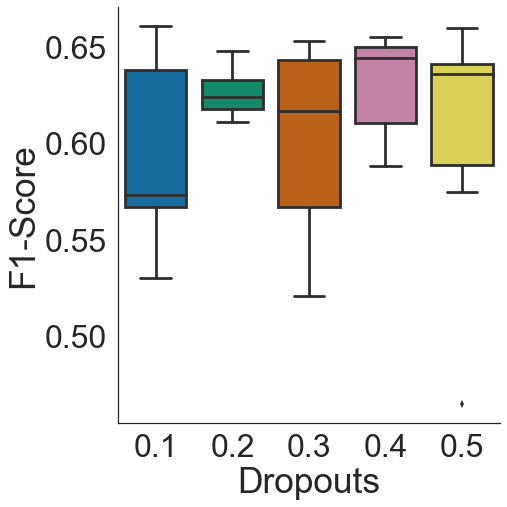

In [38]:
sns.factorplot(data=classifiers[classifiers.Config == 'Explore'], kind='box',
               y='F1-Score', x='Dropouts',# hue='Time/Feature',
               size=8, legend_out=False)

# Essays

In [39]:
essay_results = pandas.read_csv('../../results/essays_classifiers.tsv', sep='\t')
essay_results[:3]

,Name,Accuracy,Precision,Recall,F1-Score,Attention,Time/Feature,Activation,Char embed,Char embed size,Last layer,Layers,Dropouts,Batch Size
0,18-11-11-13-00,0.671,0.665,0.671,0.664,No,None,None,None,32,Softmax,50,0.3,30
1,18-11-11-13-09,0.688,0.685,0.688,0.678,No,None,None,cnn,32,Softmax,100,0.5,50
2,18-11-11-13-20,0.653,0.652,0.653,0.651,No,None,None,cnn,16,Softmax,50,0.1,50


In [40]:
essay_results = essay_results.rename(columns={'Time/Feature': 'Attention type'})
essay_results = essay_results.replace(
    to_replace=['time_pre', 'feature_pre'], value=['Word attention', 'Context attention'])
essay_results = essay_results.replace(
    to_replace=['Time', 'Feature'], value=['Word attention', 'Context attention'])
essay_results['Attention type'] = essay_results['Attention type'].replace('None', 'No attention')
essay_results['Activation'] = essay_results['Activation'].replace('None', 'Linear').replace(
    'sigmoid', 'Sigmoid').replace('tanh', 'Tanh')

/home/mteruel/anaconda2/envs/env35/lib/python3.5/site-packages/seaborn/categorical.py:490: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


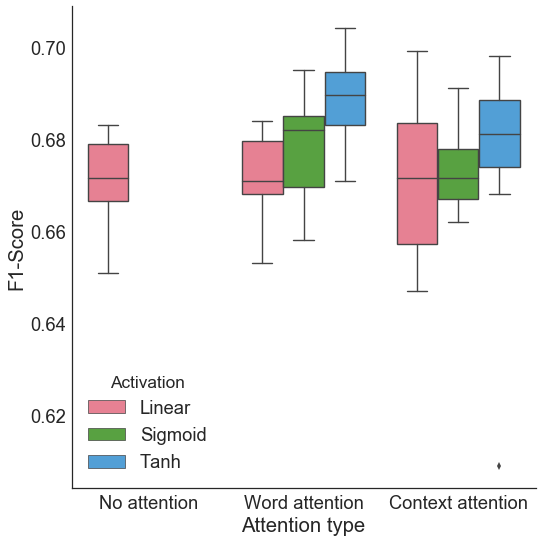

In [50]:
sns.factorplot(data=essay_results, kind='box', y='F1-Score', x='Attention type', hue='Activation',
               size=8, legend_out=False, dodge=True, palette='husl')

/home/mteruel/anaconda2/envs/env35/lib/python3.5/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


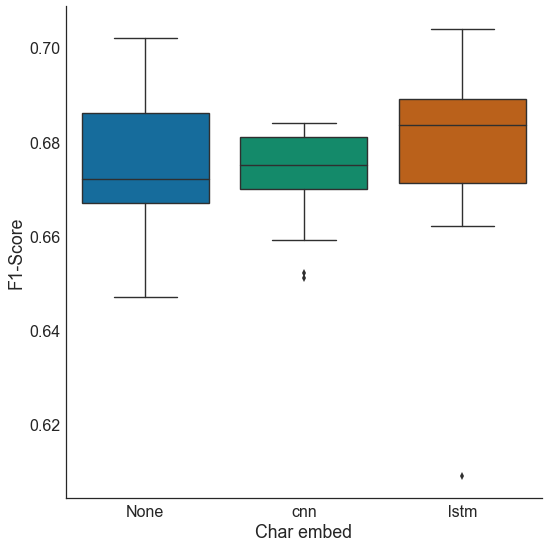

In [13]:
sns.factorplot(data=essay_results, kind='box', y='F1-Score', x='Char embed',
               size=8, legend_out=False)

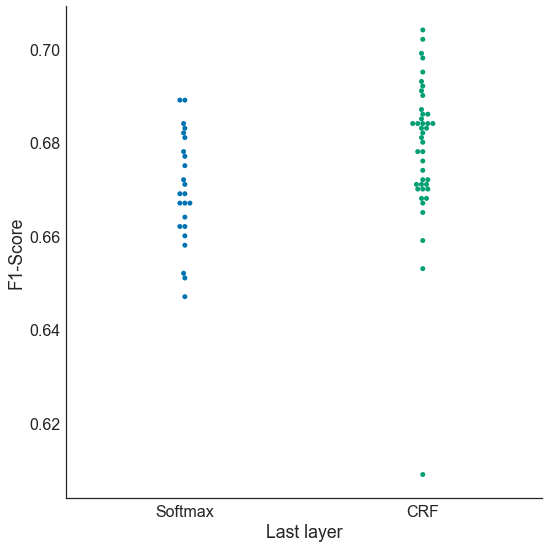

In [14]:
sns.factorplot(data=essay_results, kind='swarm', y='F1-Score', x='Last layer',
               size=8, legend_out=False)

/home/mteruel/anaconda2/envs/env35/lib/python3.5/site-packages/seaborn/categorical.py:490: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


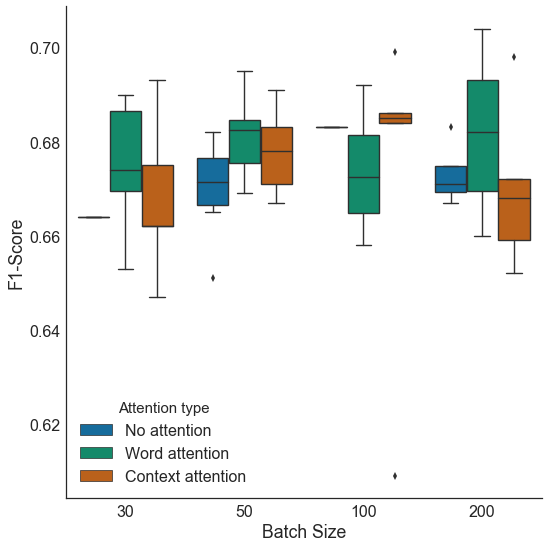

In [15]:
sns.factorplot(data=essay_results, kind='box', y='F1-Score', x='Batch Size', hue='Attention type',
               size=8, legend_out=False)

/home/mteruel/anaconda2/envs/env35/lib/python3.5/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


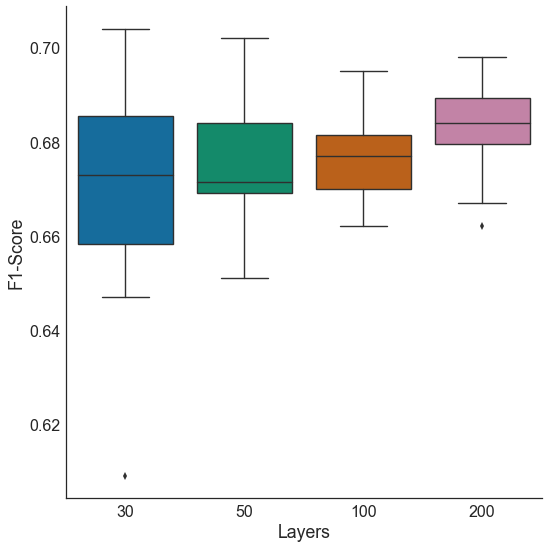

In [16]:
sns.factorplot(data=essay_results, kind='box', y='F1-Score', x='Layers', # hue='Attention type',
               size=8, legend_out=False)

In [17]:
shared_columns = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Attention', 'Attention type', 'Activation']

In [18]:
echr_only = classifiers[classifiers.Config == 'Explore'][shared_columns][classifiers.Config == 'Explore']
echr_only.loc[:,'Task'] = 'ECHR'
essays_only = essay_results[shared_columns]
essays_only.loc[:,'Task'] = 'Essays'
both_tasks = pandas.concat([echr_only, essays_only])

/home/mteruel/anaconda2/envs/env35/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/home/mteruel/anaconda2/envs/env35/lib/python3.5/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/mteruel/anaconda2/envs/env35/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


/home/mteruel/anaconda2/envs/env35/lib/python3.5/site-packages/seaborn/categorical.py:490: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


(0.51, 0.71)

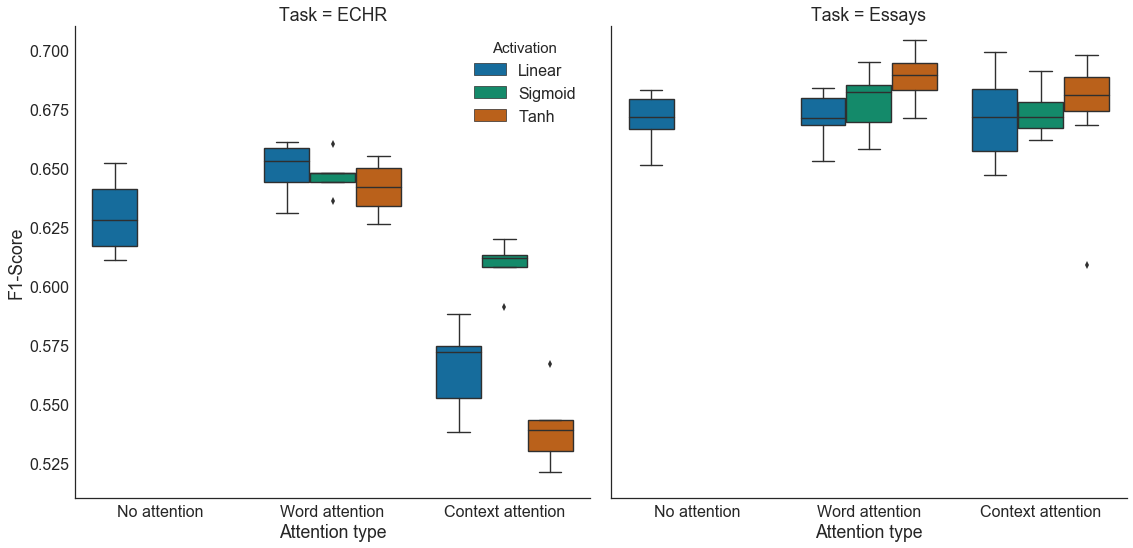

In [19]:
gr = sns.factorplot(data=both_tasks, kind='box', y='F1-Score', x='Attention type', hue='Activation',
               size=8, legend_out=False, col='Task')
gr.axes[0,0].set_ylim([0.51, 0.71])
gr.axes[0,1].set_ylim([0.51, 0.71])

---

# Claim detection

In [52]:
echr_claim_det = pandas.read_csv('../../results/ukpnets/echr_claim_detection.tsv', sep='\t')
echr_claim_det = echr_claim_det.rename(columns={'Time/Feature': 'Attention type'})
echr_claim_det = echr_claim_det.replace(
    to_replace=['Word', 'Context'], value=['Word attention', 'Context attention'])
echr_claim_det['Attention type'] = echr_claim_det['Attention type'].replace('None', 'No attention')
echr_claim_det['Activation'] = echr_claim_det['Activation'].replace('None', 'Linear').replace(
    'tanh', 'Tanh').replace('sigmoid', 'Sigmoid')

/home/mteruel/anaconda2/envs/env35/lib/python3.5/site-packages/seaborn/categorical.py:490: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


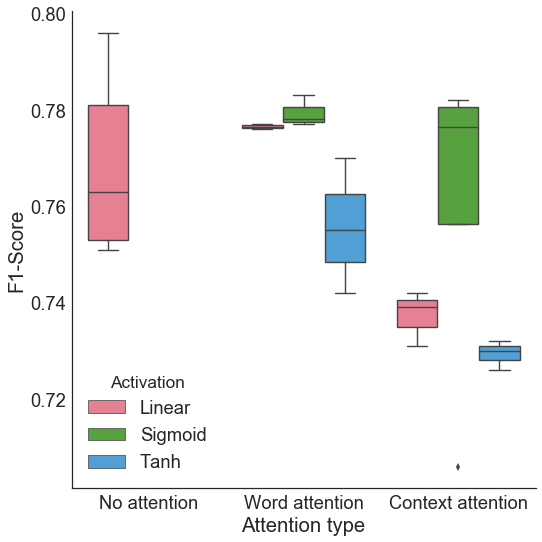

In [54]:
sns.factorplot(data=echr_claim_det[echr_claim_det.Config == 'Explore'],
               kind='box', y='F1-Score', x='Attention type', hue='Activation',
               size=8, legend_out=False, palette='husl')

In [55]:
essays_claim_detection = pandas.read_csv('../../results/essays_claim_detection.tsv', sep='\t')
essays_claim_detection = essays_claim_detection.rename(columns={'Time/Feature': 'Attention type'})
essays_claim_detection = essays_claim_detection.replace(
    to_replace=['time_pre', 'feature_pre'], value=['Word attention', 'Context attention'])
essays_claim_detection = essays_claim_detection.replace(
    to_replace=['Time', 'Feature'], value=['Word attention', 'Context attention'])
essays_claim_detection['Attention type'] = essays_claim_detection['Attention type'].replace('None', 'No attention')
essays_claim_detection['Activation'] = essays_claim_detection['Activation'].replace('None', 'Linear').replace(
    'sigmoid', 'Sigmoid').replace('tanh', 'Tanh')

In [56]:
essays_claim_detection[:3]

,Name,Accuracy,Precision,Recall,F1-Score,Attention,Attention type,Activation,Char embed,Char embed size,Last layer,Layers,Dropouts,Batch Size
0,18-11-15-14-45,0.816,0.811,0.816,0.813,No,No attention,Linear,None,32,CRF,100,0.4,30
1,18-11-15-15-46,0.817,0.821,0.817,0.819,No,No attention,Linear,cnn,64,CRF,30,0.4,30
2,18-11-15-16-47,0.810,0.825,0.810,0.815,No,No attention,Linear,lstm,16,CRF,50,0.3,50


/home/mteruel/anaconda2/envs/env35/lib/python3.5/site-packages/seaborn/categorical.py:490: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


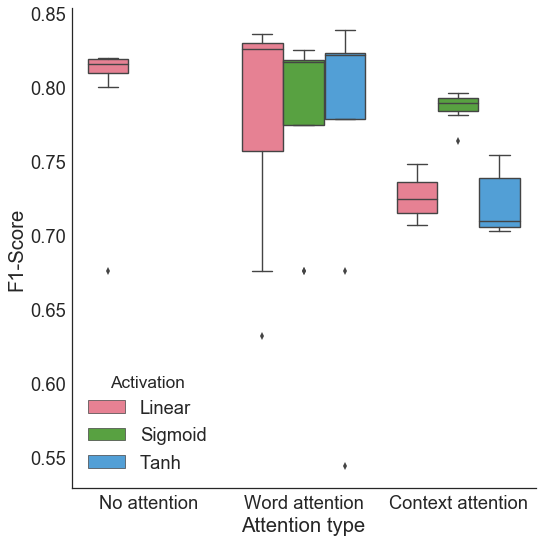

In [57]:
sns.factorplot(data=essays_claim_detection,
               kind='box', y='F1-Score', x='Attention type', hue='Activation',
               size=8, legend_out=False, palette='husl')

In [25]:
echr_cd_only = echr_claim_det[echr_claim_det.Config == 'Explore'][shared_columns][echr_claim_det.Config == 'Explore']
echr_cd_only.loc[:,'Task'] = 'ECHR'
essays_cd_only = essays_claim_detection[shared_columns]
essays_cd_only.loc[:,'Task'] = 'Essays'
both_cd_tasks = pandas.concat([echr_cd_only, essays_cd_only])

/home/mteruel/anaconda2/envs/env35/lib/python3.5/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/mteruel/anaconda2/envs/env35/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


/home/mteruel/anaconda2/envs/env35/lib/python3.5/site-packages/seaborn/categorical.py:490: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


(0.65, 0.85)

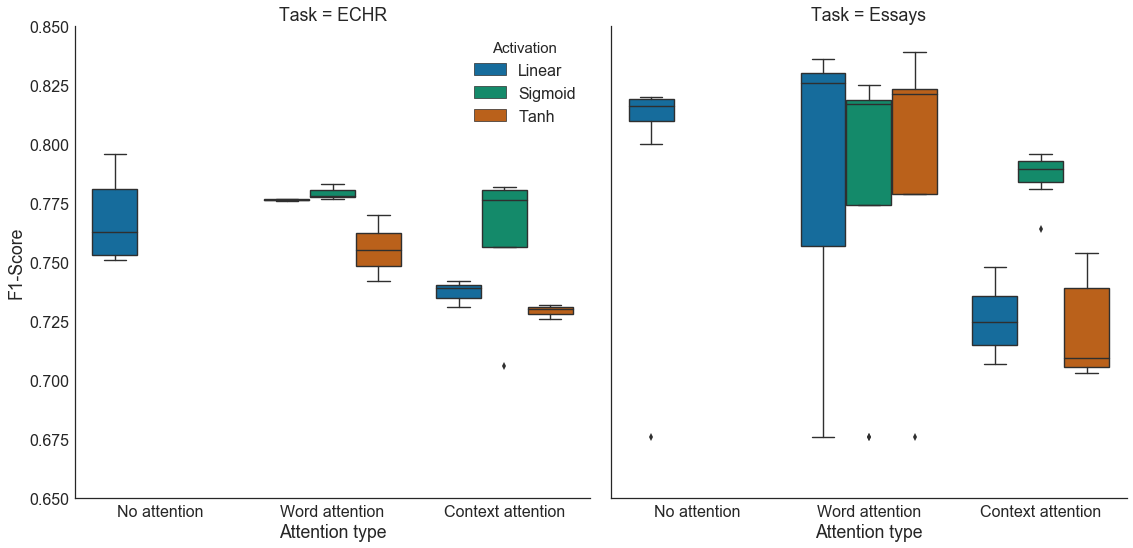

In [26]:
gr = sns.factorplot(data=both_cd_tasks, kind='box', y='F1-Score', x='Attention type', hue='Activation',
               size=8, legend_out=False, col='Task')
gr.axes[0,0].set_ylim([0.65, 0.85])
gr.axes[0,1].set_ylim([0.65, 0.85])